### $$Session-17-Project-4$$

Problem 1: 
There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance 
 
Problem 2: 
How many Unique patterns that exist in the historical stock data set, based on fluctuations in price. 
 
Problem 3: 
Identify which all stocks are moving together and which all stocks are different from each other. 

#### Import Libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pylab

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#### Read stock dataset
Download dataset from "https://drive.google.com/uc?id=1pP0Rr83ri0voscgr95-YnVCBv6BYV22w&export=download" and place in the current folder

In [2]:
stock_data = pd.read_csv("data_stocks.csv")

#### Viewing the  Datasets

In [3]:
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,1491226200,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,1491226260,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,1491226320,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,1491226380,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,1491226440,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


#### View Shape of Data Frame

In [4]:
stock_data.shape
print("shape of the DataFrame is : {}".format(stock_data.shape))
print("Rows : {0} \nColumns : {1}".format(stock_data.shape[0],stock_data.shape[1]))

shape of the DataFrame is : (41266, 502)
Rows : 41266 
Columns : 502


#### Checking the Data Type

In [5]:
stock_data.dtypes.unique()

array([dtype('int64'), dtype('float64')], dtype=object)

#### Check Columns of the stock_data

In [6]:
stock_data.columns.values

array(['DATE', 'SP500', 'NASDAQ.AAL', 'NASDAQ.AAPL', 'NASDAQ.ADBE',
       'NASDAQ.ADI', 'NASDAQ.ADP', 'NASDAQ.ADSK', 'NASDAQ.AKAM',
       'NASDAQ.ALXN', 'NASDAQ.AMAT', 'NASDAQ.AMD', 'NASDAQ.AMGN',
       'NASDAQ.AMZN', 'NASDAQ.ATVI', 'NASDAQ.AVGO', 'NASDAQ.BBBY',
       'NASDAQ.BIIB', 'NASDAQ.CA', 'NASDAQ.CBOE', 'NASDAQ.CELG',
       'NASDAQ.CERN', 'NASDAQ.CHRW', 'NASDAQ.CHTR', 'NASDAQ.CINF',
       'NASDAQ.CMCSA', 'NASDAQ.CME', 'NASDAQ.COST', 'NASDAQ.CSCO',
       'NASDAQ.CSX', 'NASDAQ.CTAS', 'NASDAQ.CTSH', 'NASDAQ.CTXS',
       'NASDAQ.DISCA', 'NASDAQ.DISCK', 'NASDAQ.DISH', 'NASDAQ.DLTR',
       'NASDAQ.EA', 'NASDAQ.EBAY', 'NASDAQ.EQIX', 'NASDAQ.ESRX',
       'NASDAQ.ETFC', 'NASDAQ.EXPD', 'NASDAQ.EXPE', 'NASDAQ.FAST',
       'NASDAQ.FB', 'NASDAQ.FFIV', 'NASDAQ.FISV', 'NASDAQ.FITB',
       'NASDAQ.FLIR', 'NASDAQ.FOX', 'NASDAQ.FOXA', 'NASDAQ.GILD',
       'NASDAQ.GOOG', 'NASDAQ.GOOGL', 'NASDAQ.GRMN', 'NASDAQ.GT',
       'NASDAQ.HAS', 'NASDAQ.HBAN', 'NASDAQ.HOLX', 'NASDAQ.HSIC',
     

#### Viewing Summary

In [7]:
stock_data.describe()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
count,4.126600e+04,41266.000000,41266.000000,41266.000000,41266.00000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,...,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000,41266.000000
mean,1.497749e+09,2421.537882,47.708346,150.453566,141.31793,79.446873,103.480398,102.998608,50.894352,122.981163,...,97.942211,104.740666,46.664402,43.043984,80.784595,19.300718,54.541988,71.757891,121.423515,60.183874
std,3.822211e+06,39.557135,3.259377,6.236826,6.91674,2.000283,4.424244,9.389788,4.833931,11.252010,...,5.411795,10.606694,1.508444,1.714533,1.840989,11.686532,3.526321,4.038272,5.607070,3.346887
min,1.491226e+09,2329.139900,40.830000,140.160000,128.24000,74.800000,95.870000,83.000000,44.650000,96.250000,...,83.410000,89.510000,44.090000,39.120000,76.060000,6.660000,48.820000,63.180000,110.120000,52.300000
25%,1.494432e+09,2390.860100,44.945400,144.640000,135.19500,78.030000,101.300000,94.820000,47.440000,116.950000,...,95.960000,95.010000,45.155000,41.955000,80.220000,7.045000,51.630000,69.110000,117.580000,59.620000
50%,1.497638e+09,2430.149900,48.360000,149.945000,142.26000,79.410000,102.440000,106.820000,49.509900,123.620000,...,99.250000,99.660000,46.810000,43.200000,81.150000,27.890000,53.850000,73.470000,120.650000,61.585600
75%,1.501090e+09,2448.820100,50.180000,155.065000,147.10000,80.580000,104.660000,110.490000,52.230000,132.218800,...,102.080000,117.034700,47.730000,44.370000,82.062050,30.470000,57.140000,74.750000,126.000000,62.540000
max,1.504210e+09,2490.649900,54.475000,164.510000,155.33000,90.440000,121.770000,119.270000,62.560000,142.875000,...,106.375000,123.870000,49.660000,47.210000,83.630000,32.930000,62.130000,77.120000,133.450000,63.840000


#### As we observed from the stock_data header, Date is in UNIX format which need to converted to make this dataset in readable format

In [8]:
stock_data['DATE'] = pd.to_datetime(stock_data['DATE'],unit='s')

#### Check the header after changing the Date format

In [9]:
stock_data.head()

,DATE,SP500,NASDAQ.AAL,NASDAQ.AAPL,NASDAQ.ADBE,NASDAQ.ADI,NASDAQ.ADP,NASDAQ.ADSK,NASDAQ.AKAM,NASDAQ.ALXN,...,NYSE.WYN,NYSE.XEC,NYSE.XEL,NYSE.XL,NYSE.XOM,NYSE.XRX,NYSE.XYL,NYSE.YUM,NYSE.ZBH,NYSE.ZTS
0,2017-04-03 13:30:00,2363.6101,42.3300,143.6800,129.6300,82.040,102.2300,85.2200,59.760,121.52,...,84.370,119.035,44.40,39.88,82.03,7.36,50.22,63.86,122.000,53.350
1,2017-04-03 13:31:00,2364.1001,42.3600,143.7000,130.3200,82.080,102.1400,85.6500,59.840,121.48,...,84.370,119.035,44.11,39.88,82.03,7.38,50.22,63.74,121.770,53.350
2,2017-04-03 13:32:00,2362.6799,42.3100,143.6901,130.2250,82.030,102.2125,85.5100,59.795,121.93,...,84.585,119.260,44.09,39.98,82.02,7.36,50.12,63.75,121.700,53.365
3,2017-04-03 13:33:00,2364.3101,42.3700,143.6400,130.0729,82.000,102.1400,85.4872,59.620,121.44,...,84.460,119.260,44.25,39.99,82.02,7.35,50.16,63.88,121.700,53.380
4,2017-04-03 13:34:00,2364.8501,42.5378,143.6600,129.8800,82.035,102.0600,85.7001,59.620,121.60,...,84.470,119.610,44.11,39.96,82.03,7.36,50.20,63.91,121.695,53.240


#### As observed from the above header, All the stocks are having multiple entries for each day So there is need to convert stock dataset which will be having Open, Closse, High and Low price for any perticular day

In [10]:
stock_data_copy = stock_data.copy()

#### Create DF_list -> Dictionary which contains all the stocks data items with the values as Open, Close, High, Low.
#### Create DF_list1 -> Dictionary which contains all the stocks data items with the Closing values

In [11]:
DF_list = {}
DF_list1 = {}
df2 = pd.DataFrame()
for column in stock_data_copy.columns[1:]:
    try :
        df_col = column.split('.')[1]
        #print(df_col)
    except :
        df_col = column        
        
    Open = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].first()
    Low = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].min()
    High = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].max()
    Close = stock_data_copy.groupby([stock_data_copy['DATE'].dt.date])[column].last()
        
    df = pd.DataFrame([Open,Close,Low,High])
    #df1 = pd.concat([df1,Close])
    df1 = pd.DataFrame([Close])
    
    df = df.transpose()
    df1 = df1.transpose()
    
    df.columns = ['Open','Low','High','Close']
    df1.columns = [df_col]
    
    DF_list[df_col] = df
    DF_list1[df_col] = df1
    #df2.join(df1)
    #print(df.head())

#### Create a DataFrame df5 (Merge all the stock data present in the dictionary DF_list1)

In [12]:
df5 = DF_list1['AAL'].reset_index()
for item in DF_list1.keys():
    df5 = pd.merge(df5,DF_list1[item].reset_index())
df5.index = df5['DATE']
df5 = df5.drop('DATE', axis=1)

In [13]:
df5.head()

,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,42.48,2358.9600,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,40.90,2359.9600,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,41.31,2352.8401,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,41.72,2357.6699,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,41.81,2355.6899,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


# Problem 1: There are various stocks for which we have collected a data set, which all stocks are apparently similar in performance¶

In [14]:
from math import sqrt

#Calculate average annual percentage return and volatilities over a theoretical one year period
returns = df5.pct_change().mean() * 252
returns = pd.DataFrame(returns)
returns.columns = ['Returns']
returns['Volatility'] = df5.pct_change().std() * sqrt(252)

#format the data as a numpy array to feed into the K-Means algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

#removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)

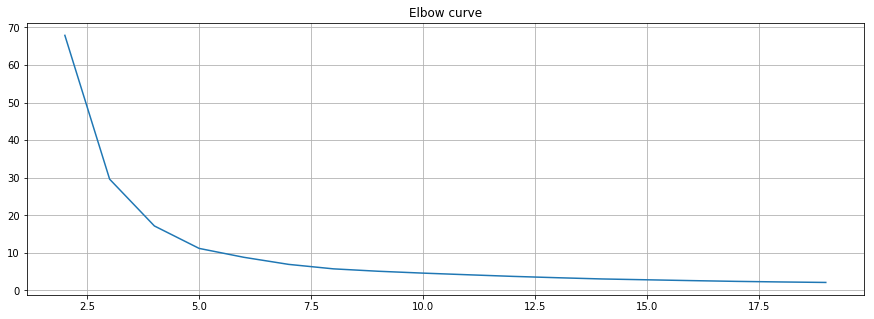

In [15]:
from sklearn.cluster import KMeans
X = cleaned_data

# calculate the sum of squares of the distance of each data point in cluster k from their center point ki.
wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)

fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

In [16]:
from scipy.cluster.vq import kmeans,vq

# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(cleaned_data,5)

# assign each sample to a cluster
idx,_ = vq(cleaned_data,centroids) 
data = cleaned_data

#### Visualization using scatter plt 

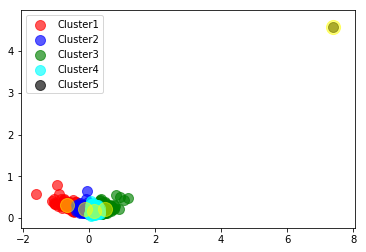

In [17]:
plt.scatter(X[idx==0,0],X[idx==0,1],s=100,c='red',label='Cluster1',alpha=0.65)
plt.scatter(X[idx==1,0],X[idx==1,1],s=100,c='blue',label='Cluster2',alpha=0.65)
plt.scatter(X[idx==2,0],X[idx==2,1],s=100,c='green',label='Cluster3',alpha=0.65)
plt.scatter(X[idx==3,0],X[idx==3,1],s=100,c='cyan',label='Cluster4',alpha=0.65)
plt.scatter(X[idx==4,0],X[idx==4,1],s=100,c='black',label='Cluster5',alpha=0.65)

# plt.scatter(k_means.cluster_centers_[:,0],k_means.cluster_centers_[:,1],s=300,c='yellow')
plt.scatter(centroids[:,0],centroids[:,1],s=200, c='yellow', alpha = 0.5)
plt.legend()
plt.show()

Ok, so it looks like we have an outlier in the data which is skewing the results and making it difficult to actually see what is going on for all the other stocks. Let’s take the easy route and just delete the outlier from our data set and run this again.

#### Identify the outlier

In [18]:
print(returns.idxmax())

Returns       XRX
Volatility    XRX
dtype: object


#### drop the outlier stock

In [19]:
returns.drop('XRX',inplace=True)

# recreate data to feed into the algorithm
data = np.asarray([np.asarray(returns['Returns']),np.asarray(returns['Volatility'])]).T

# removing NaN values, replacing them by 0
cleaned_data = np.where(np.isnan(data), 0, data)

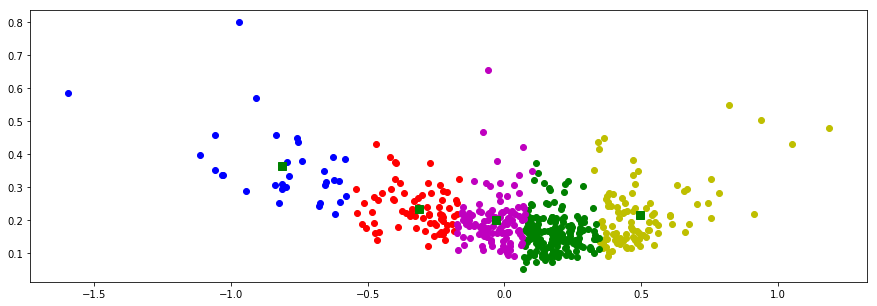

In [20]:
from pylab import plot,show

# computing K-Means with K = 5 (5 clusters)
centroids,_ = kmeans(cleaned_data,5)

# assign each sample to a cluster
idx,_ = vq(cleaned_data,centroids) 
data = cleaned_data
fig = plt.figure(figsize=(15, 5))

# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

#### Finally to get the details of which stock is actually in which cluster we can run the following line of code to carry out a list comprehension to create a list of tuples in the (Stock Name, Cluster Number) format

In [21]:
details = [(name,cluster) for name, cluster in zip(returns.index,idx)]

In [22]:
df = pd.DataFrame.from_records(details,columns=['Stock','Cluster'])
df.head(n=10)

,Stock,Cluster
0,AAL,3
1,SP500,3
2,AAPL,3
3,ADBE,1
4,ADI,3
5,ADP,3
6,ADSK,1
7,AKAM,2
8,ALXN,1
9,AMAT,1


***We now have a list of each of the stocks , along with which one of 5 clusters they belong to with the clusters being defined by their return and volatility characteristics***

# Problem 2:
How many Unique patterns that exist in the historical stock data set, based on fluctuations in price.

In [23]:
df5.head(5)

,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,42.48,2358.9600,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,40.90,2359.9600,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,41.31,2352.8401,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,41.72,2357.6699,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,41.81,2355.6899,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


#### getting the list of columns and index of dataframe

In [24]:
df_col=df5.columns.values.tolist()
df_index=df5.index.values.tolist()

#### Calculating diff to previous value to come up with fluctuation in data

In [25]:
df5_diff=df5.diff(periods=1,axis=0)

#### Filling NAN with 0, as after diff first row will be NAN

In [26]:
df5_fluctuation=df5_diff.fillna(0)
df5_fluctuation.head(5)

,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,0.00,0.0000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000
2017-04-04,-1.58,1.0000,1.070,0.42,0.02,0.18,-0.44,1.20,-0.98,0.11,...,0.17,1.81,0.11,0.32,0.26,-0.03,0.93,0.29,-0.57,-0.535
2017-04-05,0.41,-7.1199,-0.750,-0.15,-1.20,0.48,-1.41,-0.50,-2.09,-0.62,...,0.16,-2.27,0.31,-0.34,0.19,-0.07,0.05,0.03,-0.61,0.030
2017-04-06,0.41,4.8298,-0.335,0.26,0.28,-0.18,0.53,-0.07,-0.72,0.21,...,0.83,0.49,-0.21,0.43,0.49,-0.02,0.52,0.69,0.05,0.010
2017-04-07,0.09,-1.9800,-0.345,0.07,-0.31,0.44,0.72,-0.63,0.13,0.34,...,-0.48,0.08,-0.20,0.02,-0.24,0.00,-0.09,-0.28,-0.34,-0.130


#### Scaling the data using MinMaxScaler and transposing the dataframe to have stocks as index

In [27]:
from sklearn.preprocessing import MinMaxScaler
df5_scale_fluctuation = MinMaxScaler().fit(df5_fluctuation).transform(df5_fluctuation)
df_scale=pd.DataFrame(df5_scale_fluctuation,columns=df_col,index=df_index)
df_scale_T=df_scale.T
df_scale_T.head()

,2017-04-03,2017-04-04,2017-04-05,2017-04-06,2017-04-07,2017-04-10,2017-04-11,2017-04-12,2017-04-13,2017-04-17,...,2017-08-18,2017-08-21,2017-08-22,2017-08-23,2017-08-24,2017-08-25,2017-08-28,2017-08-29,2017-08-30,2017-08-31
AAL,0.509474,0.176842,0.595789,0.595789,0.528421,0.616842,0.848421,0.515789,0.381053,0.694737,...,0.408421,0.543158,0.446316,0.206316,0.288421,1.000000,0.446316,0.427368,0.458947,0.597895
SP500,0.633436,0.648075,0.529207,0.704140,0.604450,0.654516,0.585859,0.498024,0.406675,0.924171,...,0.561413,0.670619,0.990190,0.510322,0.558775,0.698873,0.642367,0.667396,0.793445,0.841017
AAPL,0.458779,0.540458,0.401527,0.433206,0.432443,0.443511,0.343511,0.471756,0.401527,0.516031,...,0.430534,0.436641,0.654962,0.474046,0.408397,0.500000,0.581679,0.573282,0.487786,0.506870
ADBE,0.579014,0.632111,0.560051,0.611884,0.587863,0.571429,0.552465,0.506953,0.537295,0.697851,...,0.546144,0.742099,0.957016,0.433628,0.542351,0.659924,0.621997,0.623262,0.772440,0.767383
ADI,0.484549,0.487021,0.336218,0.519159,0.446230,0.400494,0.330037,0.334981,0.440049,0.469716,...,0.506799,0.479604,0.666255,0.472188,0.509271,0.447466,0.542645,0.498146,1.000000,0.480841


#### Reducing dimensionality using PCA

In [28]:
from sklearn import decomposition
pca=decomposition.PCA(n_components=3)
pca.fit(df_scale_T)
df_pca=pca.transform(df_scale_T)

#### Here we see that 3 features contribute to 51% variance in data. if we want more features, we can increase it

In [29]:
pca.explained_variance_ratio_

array([0.50769372, 0.05147846, 0.0426742 ])

#### Applying KMeans on PCA. Coming up with optimal value of no. of clusters

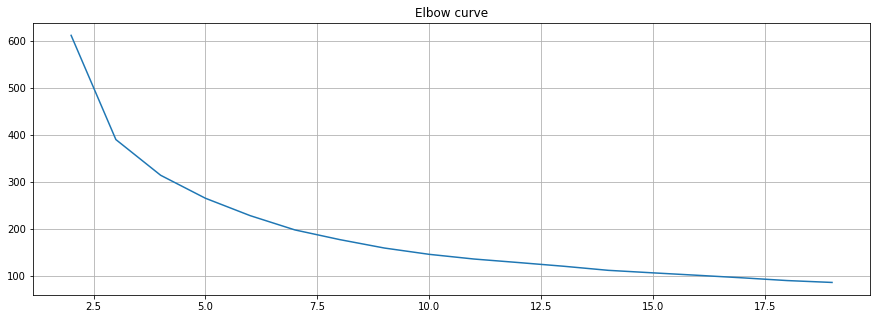

In [30]:
from sklearn.cluster import KMeans
X =df_pca
wcss = []
for k in range(2, 20):
    k_means = KMeans(n_clusters=k)
    k_means.fit(X)
    wcss.append(k_means.inertia_)
fig = plt.figure(figsize=(15, 5))
plt.plot(range(2, 20), wcss)
plt.grid(True)
plt.title('Elbow curve')
plt.show()

#### Choosing elbow point k=7

In [31]:
k = 7
k_means = KMeans(n_clusters=k)
k_means.fit(X)
y_pred = k_means.fit_predict(X)

In [32]:
k_means.cluster_centers_

array([[ 0.09635825,  1.07342176, -0.45040763],
       [ 0.34648092,  0.04753411,  0.30304742],
       [-2.22882737,  0.07066432, -0.05190097],
       [ 0.05672355, -0.48313689, -0.4019681 ],
       [-0.97383245, -0.06846459,  0.15589024],
       [ 2.96161632,  0.01410944, -0.01487758],
       [ 1.56536088, -0.047983  ,  0.05827605]])

In [33]:
k_means.labels_

array([1, 4, 1, 4, 1, 6, 5, 2, 1, 4, 2, 1, 4, 1, 6, 4, 1, 1, 6, 1, 5, 4,
       6, 5, 4, 4, 2, 2, 1, 5, 6, 1, 4, 2, 4, 6, 6, 4, 4, 2, 1, 2, 4, 2,
       1, 2, 2, 4, 1, 3, 1, 5, 1, 1, 6, 3, 4, 4, 2, 4, 2, 5, 1, 4, 4, 5,
       1, 6, 4, 4, 3, 1, 6, 2, 1, 1, 1, 1, 4, 4, 3, 1, 5, 1, 2, 6, 3, 1,
       2, 1, 3, 6, 2, 1, 6, 4, 1, 1, 6, 2, 5, 4, 5, 6, 2, 4, 4, 3, 1, 3,
       4, 4, 2, 2, 1, 5, 2, 4, 5, 5, 1, 1, 2, 4, 6, 2, 1, 2, 6, 2, 2, 3,
       0, 0, 0, 1, 5, 4, 1, 6, 6, 6, 4, 1, 6, 6, 6, 4, 3, 1, 4, 1, 4, 3,
       4, 6, 1, 0, 4, 1, 4, 0, 5, 4, 2, 5, 4, 1, 3, 6, 5, 4, 4, 1, 2, 4,
       4, 2, 4, 6, 1, 3, 2, 3, 1, 2, 6, 4, 1, 1, 4, 1, 6, 4, 6, 3, 1, 5,
       0, 4, 2, 3, 0, 1, 0, 5, 3, 4, 1, 5, 3, 1, 2, 4, 6, 3, 3, 3, 2, 0,
       1, 1, 1, 4, 1, 5, 6, 2, 3, 5, 0, 3, 3, 2, 1, 0, 0, 2, 3, 5, 4, 0,
       1, 0, 5, 1, 6, 3, 1, 3, 0, 1, 4, 2, 1, 5, 0, 0, 3, 1, 5, 4, 6, 4,
       2, 2, 2, 5, 3, 4, 1, 2, 3, 3, 4, 4, 4, 2, 6, 3, 4, 2, 3, 4, 4, 0,
       2, 4, 3, 6, 4, 6, 3, 2, 1, 1, 2, 1, 4, 0, 6,

#### Cluster Visualization

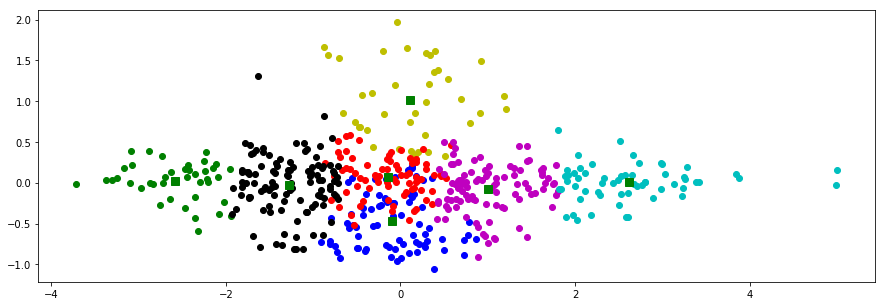

In [34]:
from pylab import plot,show
from scipy.cluster.vq import kmeans,vq
# computing K-Means with K = 7 (7 clusters)
centroids,_ = kmeans(X,7)
# assign each sample to a cluster
idx,_ = vq(X,centroids)
 
data = X

fig = plt.figure(figsize=(15, 5))
# some plotting using numpy's logical indexing
plot(data[idx==0,0],data[idx==0,1],'ob',
     data[idx==1,0],data[idx==1,1],'oy',
     data[idx==2,0],data[idx==2,1],'or',
     data[idx==3,0],data[idx==3,1],'og',
     data[idx==4,0],data[idx==4,1],'om',
     data[idx==5,0],data[idx==5,1],'ok',
     data[idx==6,0],data[idx==6,1],'oc')
plot(centroids[:,0],centroids[:,1],'sg',markersize=8)
show()

#### inertia is the sum of the squared distances between each training instance and its closest centroid:

In [35]:
k_means.inertia_

197.7327269522504

#### The score() method returns the negative inertia. Why negative? Well, it is because a predictor's score() method must always respect the "great is better" rule.

In [36]:
k_means.score(X)

-197.73272695225052

#### Displaying the Cluster in which the Stock belongs

In [37]:
details = [(name,cluster) for name, cluster in zip(df_scale_T.index,idx)]
df_cluster = pd.DataFrame.from_records(details,columns=['Stock','Cluster'])
df_cluster.head(n=10)

,Stock,Cluster
0,AAL,2
1,SP500,5
2,AAPL,4
3,ADBE,2
4,ADI,2
5,ADP,4
6,ADSK,6
7,AKAM,3
8,ALXN,2
9,AMAT,5


 ***There are 7 unique patterns based on fluctuation, which we can get the details from df_cluster***

# Problem 3:
Identify which all stocks are moving together and which all stocks are different from each other.

In [38]:
df5.head()

,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
DATE,,,,,,,,,,,,,,,,,,,,,
2017-04-03,42.48,2358.9600,143.700,129.62,81.22,101.27,85.39,58.10,119.28,38.89,...,84.01,118.11,44.39,39.39,82.08,7.25,49.43,63.55,121.35,53.175
2017-04-04,40.90,2359.9600,144.770,130.04,81.24,101.45,84.95,59.30,118.30,39.00,...,84.18,119.92,44.50,39.71,82.34,7.22,50.36,63.84,120.78,52.640
2017-04-05,41.31,2352.8401,144.020,129.89,80.04,101.93,83.54,58.80,116.21,38.38,...,84.34,117.65,44.81,39.37,82.53,7.15,50.41,63.87,120.17,52.670
2017-04-06,41.72,2357.6699,143.685,130.15,80.32,101.75,84.07,58.73,115.49,38.59,...,85.17,118.14,44.60,39.80,83.02,7.13,50.93,64.56,120.22,52.680
2017-04-07,41.81,2355.6899,143.340,130.22,80.01,102.19,84.79,58.10,115.62,38.93,...,84.69,118.22,44.40,39.82,82.78,7.13,50.84,64.28,119.88,52.550


In [39]:
df_new_corr = df5.corr() 

In [40]:
df_new_corr.head(10)

,AAL,SP500,AAPL,ADBE,ADI,ADP,ADSK,AKAM,ALXN,AMAT,...,WYN,XEC,XEL,XL,XOM,XRX,XYL,YUM,ZBH,ZTS
AAL,1.000000,0.713827,0.073530,0.533591,0.216621,0.263803,0.612765,-0.437248,0.006513,0.669487,...,0.803742,-0.741918,0.275909,0.817029,-0.047499,0.516010,0.394213,0.641651,0.578653,0.753004
SP500,0.713827,1.000000,0.552342,0.905100,0.243815,0.559021,0.842303,-0.679658,0.442006,0.753692,...,0.851642,-0.837566,0.737637,0.813457,-0.481872,0.790510,0.842165,0.913452,0.132922,0.816968
AAPL,0.073530,0.552342,1.000000,0.718841,0.288084,0.250219,0.647139,-0.709544,0.325446,0.558027,...,0.303545,-0.245859,0.743934,0.258883,-0.658093,0.332653,0.687737,0.621648,-0.587331,0.444282
ADBE,0.533591,0.905100,0.718841,1.000000,0.289480,0.483199,0.874413,-0.751036,0.496885,0.729467,...,0.718172,-0.788536,0.848353,0.718576,-0.745784,0.805026,0.916404,0.935523,-0.093018,0.770335
ADI,0.216621,0.243815,0.288084,0.289480,1.000000,-0.074022,0.490387,-0.334494,-0.386809,0.538640,...,0.223947,-0.169975,0.325093,0.068936,-0.038064,-0.003034,0.089650,0.277822,0.133406,0.364308
ADP,0.263803,0.559021,0.250219,0.483199,-0.074022,1.000000,0.335148,-0.216867,0.563600,0.103922,...,0.326973,-0.433826,0.450913,0.342901,-0.440922,0.584331,0.619649,0.423848,-0.202605,0.167117
ADSK,0.612765,0.842303,0.647139,0.874413,0.490387,0.335148,1.000000,-0.832193,0.109247,0.867863,...,0.794043,-0.718862,0.826960,0.678259,-0.511508,0.576895,0.707402,0.917324,0.010120,0.884389
AKAM,-0.437248,-0.679658,-0.709544,-0.751036,-0.334494,-0.216867,-0.832193,1.000000,-0.154983,-0.682206,...,-0.618722,0.602390,-0.774893,-0.522173,0.488455,-0.535509,-0.666298,-0.858646,0.227641,-0.808062
ALXN,0.006513,0.442006,0.325446,0.496885,-0.386809,0.563600,0.109247,-0.154983,1.000000,-0.032683,...,0.182063,-0.342701,0.286791,0.306517,-0.564675,0.695913,0.675779,0.340483,-0.280332,0.067368
AMAT,0.669487,0.753692,0.558027,0.729467,0.538640,0.103922,0.867863,-0.682206,-0.032683,1.000000,...,0.777291,-0.568190,0.586303,0.667937,-0.291837,0.355662,0.482899,0.758989,0.225387,0.842894


#### Suppose we want to see which all stocks are positively correlated to 'AAL' and moving in same direction as AAL. We can Analyse as follows

In [41]:
df_new_corr['AAL'].sort_values(ascending=False)

AAL     1.000000
DAL     0.905553
IVZ     0.862433
IT      0.854705
DE      0.850774
COH     0.843849
WRK     0.834343
HAS     0.832845
ITW     0.829472
SWK     0.827719
TEL     0.820954
MCK     0.819759
CMI     0.819125
FBHS    0.818638
XL      0.817029
EXPE    0.815396
CSRA    0.809053
GLW     0.808208
BLK     0.806058
WYN     0.803742
NWL     0.803612
AMZN    0.803476
ROP     0.803375
PKI     0.802816
MTB     0.795376
ALLE    0.794483
BEN     0.788963
MMM     0.781288
IP      0.779305
MAS     0.776846
          ...   
M      -0.539710
BXP    -0.555490
SLB    -0.557312
GWW    -0.566150
VZ     -0.569476
CSCO   -0.570536
INFO   -0.571228
HPE    -0.581529
ADM    -0.603058
NFX    -0.605409
WBA    -0.605545
BLL    -0.614534
MUR    -0.615127
MRO    -0.626876
BBBY   -0.631640
ORLY   -0.635887
APC    -0.638175
TAP    -0.651256
T      -0.652041
COP    -0.665226
TJX    -0.668099
ROST   -0.668410
CHRW   -0.668477
AZO    -0.676880
DVN    -0.692241
DLTR   -0.704289
TRIP   -0.707575
XEC    -0.7419

***If the correlation coefficient is positive, then stocks move in same direction, 
if Negative, they  move in different direction. A correlation coefficient close of 1 or -1 represents perfect
positive correlation or perfect negative correlation, respectively.***

***Clustering variables based on Correlations between them***

The next step is to look for clusters of correlations using the agglomerate hierarchical clustering technique. Its primary advantage over other clustering methods is that you don't need to guess in advance how many clusters there might be. Agglomerate Clustering first assigns each data point into its own cluster, and gradually merges clusters until only one remains. It's then up to the user to choose a cutoff threshold and decide how many clusters are present.

Linkage does the actual clustering in one line of code, and returns a list of the clusters joined in the format: Z=[stock_1, stock_2, distance, sample_count]

There are also different options for the measurement of the distance. The option we will choose is the average distance measurement, but others are possible (ward, single, centroid, etc.).

In [42]:
from scipy.cluster.hierarchy import dendrogram, linkage
Z = linkage(df_new_corr, 'average')
Z[0]

array([86.        , 87.        ,  0.33822357,  2.        ])

***Cophenetic Correlation coefficient***
It's important to get a sense of how well the clustering performs. One measure is the Cophenetic Correlation Coefficient, 
c . This compares (correlates) the actual pairwise distances of all your samples to those implied by the hierarchical clustering. The closer  c  is to 1, the better the clustering preserves the original distances. Generally  c  > 0.7 is consistered a good cluster fit. Of course, other accuracy checks are possible.

In [43]:
from scipy.cluster.hierarchy import cophenet
from scipy.spatial.distance import pdist
import pylab
c, coph_dists = cophenet(Z, pdist(df5.corr()))
c

0.851508335884941

The best way to visualize an agglomerate clustering algorithm is through a dendogram, which displays a cluster tree, the leaves being the individual stocks and the root being the final single cluster. The "distance" between each cluster is shown on the y-axis, and thus the longer the branches are, the less correlated two clusters are.

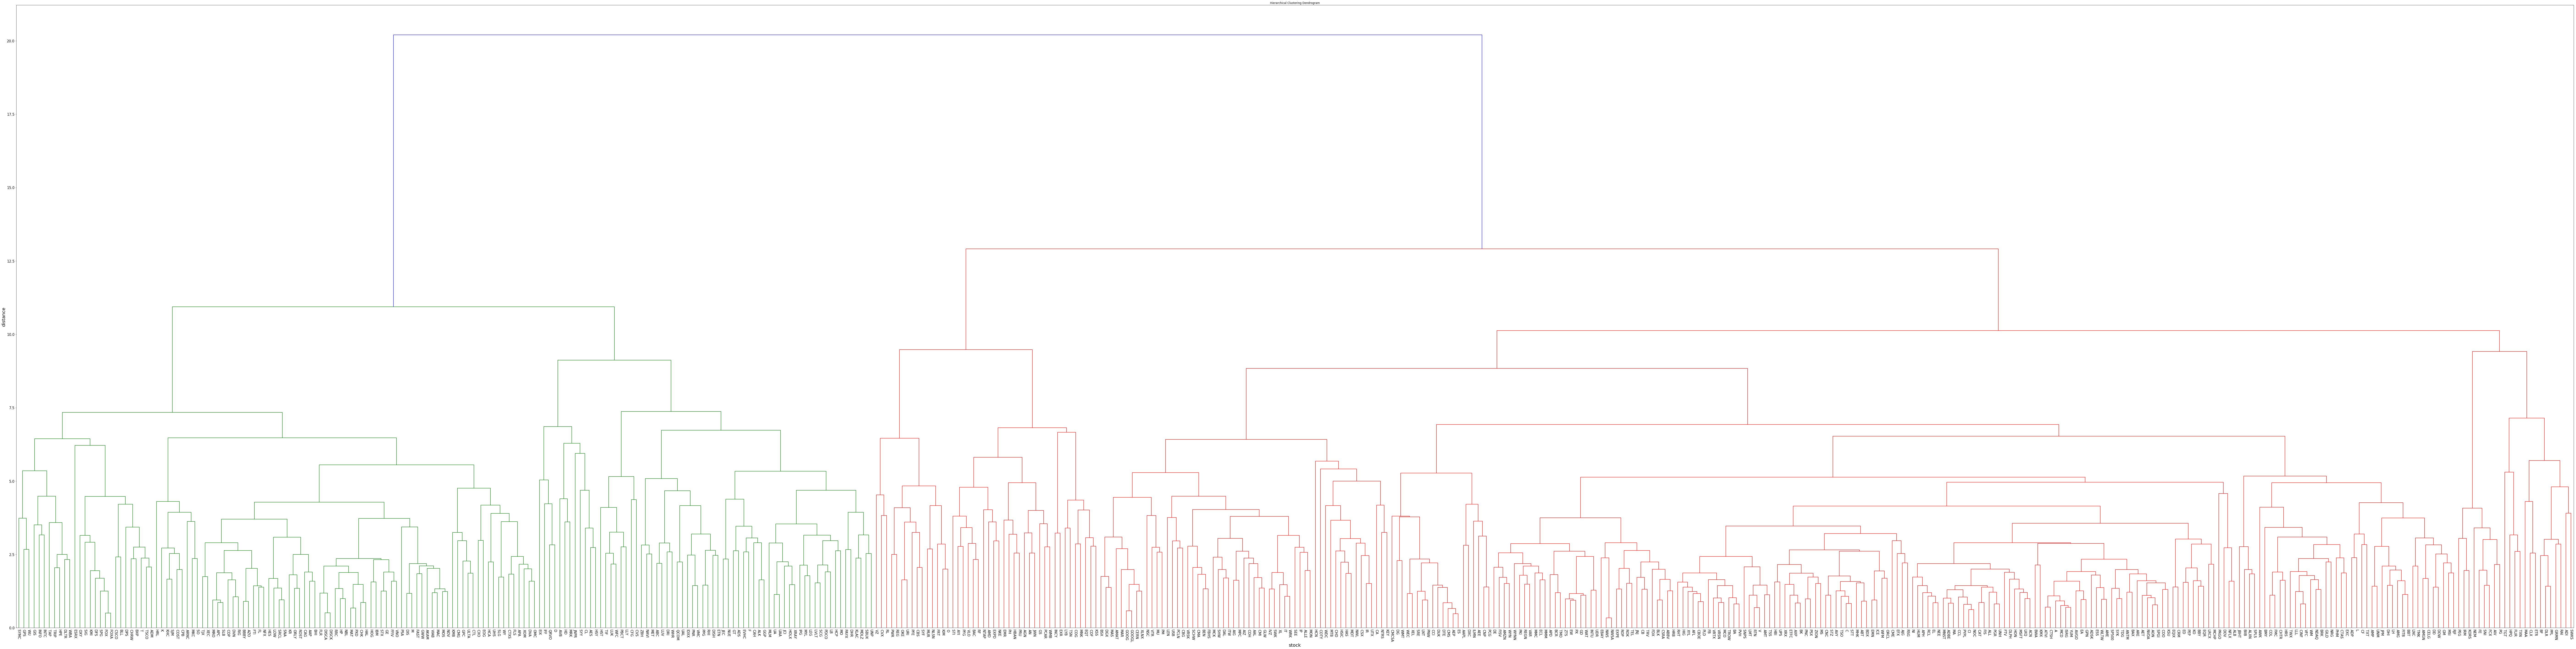

In [44]:
plt.figure(figsize=(200, 50))
labelsize=20
ticksize=15
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('stock', fontsize=labelsize)
plt.ylabel('distance', fontsize=labelsize)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=8.,  # font size for the x axis labels
    labels = df5.corr().columns
)
pylab.yticks(fontsize=ticksize)
pylab.xticks(rotation=-90, fontsize=ticksize)
plt.show()

In [45]:
from sklearn.cluster import AgglomerativeClustering

In [46]:
compTickers=df_new_corr.columns[0: ]
compTickers

Index(['AAL', 'SP500', 'AAPL', 'ADBE', 'ADI', 'ADP', 'ADSK', 'AKAM', 'ALXN',
       'AMAT',
       ...
       'WYN', 'XEC', 'XEL', 'XL', 'XOM', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZTS'],
      dtype='object', length=501)

#### Transform correlation matrix into distance matrix

* When Clustering Correlations it is important not to calculate the distance twice. 
* When you take the correlation matrix you are in essence making a distance calculation. 
* You will want to convert it to a true distance by taking 1 - the absolute value.
* Convert the correlation matrix into distance matrix. Correlation is within the interval [-1, 1] and a higher value reflects greater similarity. We'll need to transform correlation value into distance, hence we get the absolute value of (correlation - 1). The resulting value will be a distance within interval [0, 2] and a higher value reflects lower similarity.

In [47]:
num_clusters=5

affinityMatrix = abs(df_new_corr.as_matrix() - 1)
    
# Run agglomerative clustering with average-linkage with precomputed distance matrix
model = AgglomerativeClustering(linkage = 'average', affinity = 'precomputed', n_clusters = num_clusters)
aggFit = model.fit(affinityMatrix)
i=0
resultSets = [set()] * num_clusters
for l in aggFit.labels_:
    resultSets[l] = resultSets[l].union({compTickers[i]})
    i += 1

In [48]:
df_agg=pd.DataFrame(resultSets,).T
df_agg.columns=(['cluster1','cluster2','cluster3','cluster4','cluster5'])
df_agg

,cluster1,cluster2,cluster3,cluster4,cluster5
0,NI,RF,K,CBS,CLX
1,CRM,LUK,WY,KSS,DLR
2,LLL,SIG,BXP,PFE,AVB
3,LMT,JWN,GPC,VZ,HCN
4,NWS,KEY,SBUX,AMD,IFF
5,CINF,STI,HCA,EQT,VTR
6,XLNX,TIF,EOG,OKE,GRMN
7,CMS,VRSK,RHI,HST,MAA
8,FB,PH,SLG,SYF,PPL
9,JBHT,USB,WBA,EXR,MRK
